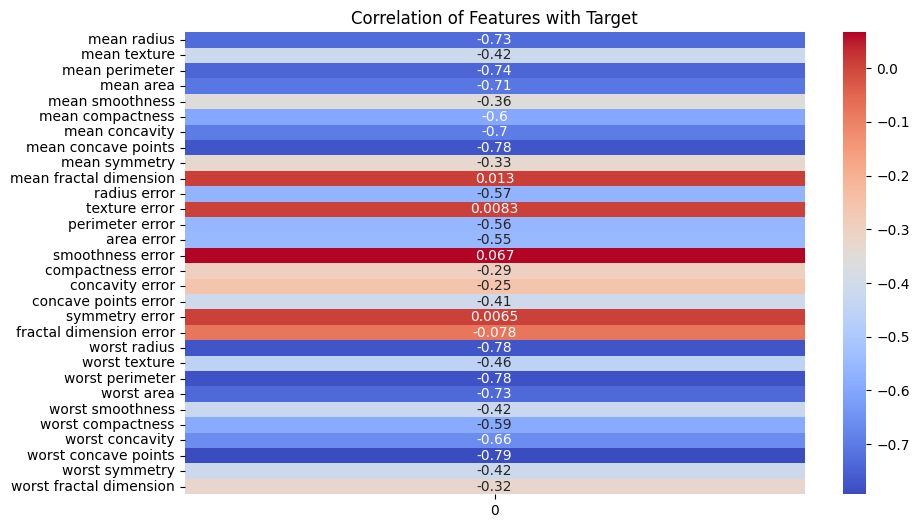


--- Correlation > 0.6 ---
Accuracy: 0.9825
Precision: 0.9817
Recall (Sensitivity): 0.9907
Specificity: 0.9683
F1 Score: 0.9862
ROC-AUC: 0.9991


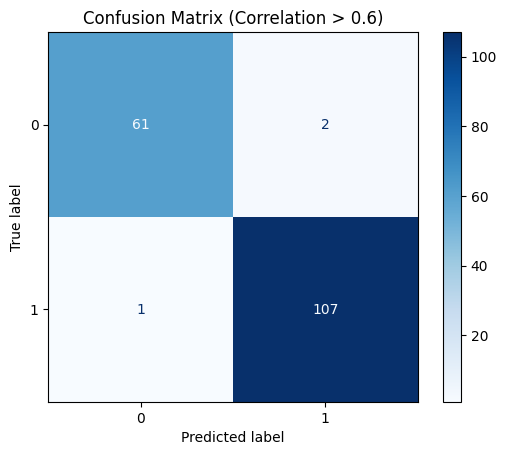

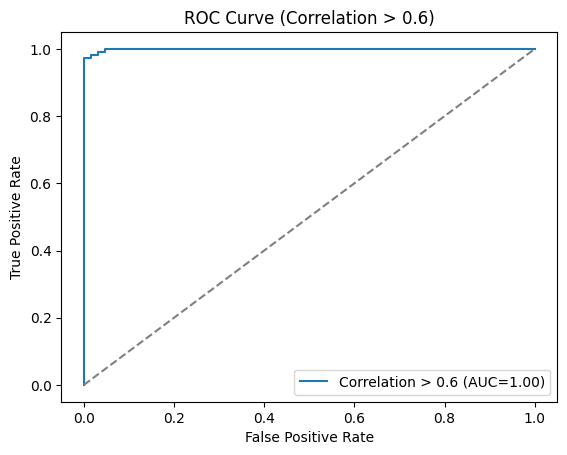


--- Correlation < 0.3 ---
Accuracy: 0.6316
Precision: 0.6316
Recall (Sensitivity): 1.0000
Specificity: 0.0000
F1 Score: 0.7742
ROC-AUC: 0.6861


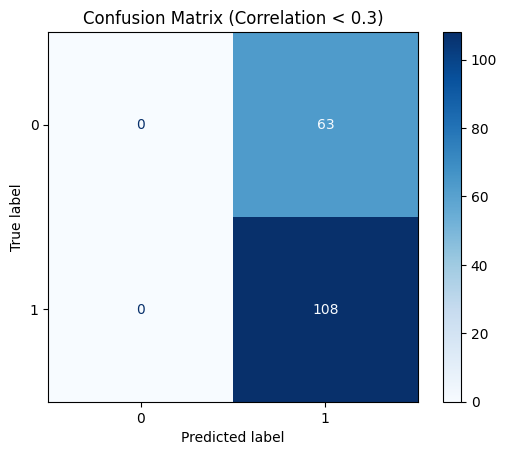

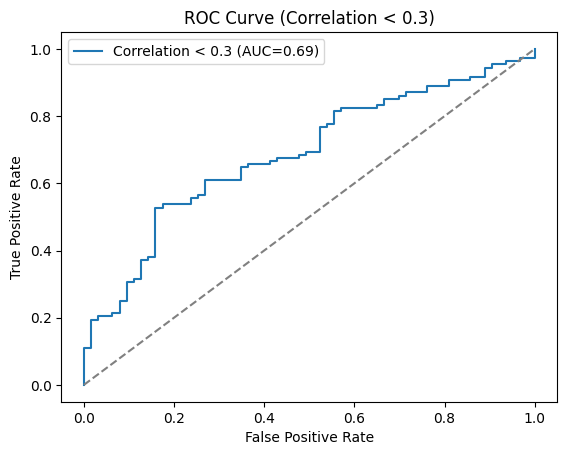

In [ ]:
# ==========================================
# LAB 6 – Logistic Regression on Breast Cancer Dataset
# ==========================================

# ---- 1. Import Libraries ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

# ---- 2. Load Dataset ----
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# ---- 3. Correlation Matrix ----
corr_matrix = X.corrwith(y)

# ---- 4. Plot Correlation Heatmap ----
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation of Features with Target")
plt.show()


# ---- 5. Logistic Regression Function ----
def run_logistic_regression(X, y, description=""):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    model = LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # ---- Metrics ----
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)  # Sensitivity
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    print(f"\n--- {description} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall (Sensitivity): {rec:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {auc:.4f}")

    # ---- Confusion Matrix ----
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
    plt.title(f"Confusion Matrix ({description})")
    plt.show()

    # ---- ROC Curve ----
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{description} (AUC={auc:.2f})")
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({description})")
    plt.legend()
    plt.show()


# ---- 6. Features with correlation > 0.6 ----
high_corr_features = corr_matrix[abs(corr_matrix) > 0.6].index
X_high = X[high_corr_features]

run_logistic_regression(X_high, y, description="Correlation > 0.6")


# ---- 7. Features with correlation < 0.3 ----
low_corr_features = corr_matrix[abs(corr_matrix) < 0.3].index
X_low = X[low_corr_features]

run_logistic_regression(X_low, y, description="Correlation < 0.3")
